In [1]:
"""
A simple example of the Stiefel landing algorithm on PCA problem
"""
from time import time

import matplotlib.pyplot as plt

import numpy as np

import torch

import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

from models import VGG16, ResNet18

from solvers import *
from experiments.utils import *

from scipy.linalg import eigh

/opt/mambaforge/envs/landing/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
batch_size = 2*256
p = 5
loader_A, loader_B = dataset_MNIST(batch_size=batch_size, download=False)

In [3]:
covA, covB, covAB = loader_to_cov(loader_A, loader_B, device = 'cuda')

In [4]:
u_true, s_true, v_true = cca_closed_form(covA, covB, covAB, epsilon=1e-3, verb = True)
u_true = u_true[:,:p]
v_true = v_true[:,:p]
obj_true = -.5*torch.trace(u_true.T@covAB@v_true).item()
print(obj_true)
dist_x = torch.linalg.norm(u_true.T@covA@u_true - torch.eye(p,device=covA.device)).item()
print(dist_x)

adding eps to diagonal and taking inverse
taking square root
dot products...
trying to take final svd
computed everything!
-2.355987071990967
0.0008320552879013121


In [5]:
x1, y1, out1  = RiemannianRollingCCA(loader_A, loader_B, p = p, learning_rate = 1e-2,  n_epochs=20, device = torch.device('cuda'), eps_regul = 1e-6, averaging=True)

Dist X: 1.04253
Dist X: 1.03468
Objective: -0.99224
Dist X: 0.00000
Dist Y: 0.00000
Objective: -1.58756
Dist X: 0.00000
Dist Y: 0.00000
Objective: -1.91297
Dist X: 0.00000
Dist Y: 0.00000
Objective: -2.08237
Dist X: 0.00000
Dist Y: 0.00000
Objective: -2.17121
Dist X: 0.00000
Dist Y: 0.00000
Objective: -2.22036
Dist X: 0.00000
Dist Y: 0.00000
Objective: -2.24973
Dist X: 0.00000
Dist Y: 0.00000
Objective: -2.26875
Dist X: 0.00000
Dist Y: 0.00000
Objective: -2.28197
Dist X: 0.00000
Dist Y: 0.00000
Objective: -2.29173
Dist X: 0.00000
Dist Y: 0.00000
Objective: -2.29928
Dist X: 0.00000
Dist Y: 0.00000
Objective: -2.30534
Dist X: 0.00000
Dist Y: 0.00000
Objective: -2.31034
Dist X: 0.00000
Dist Y: 0.00000
Objective: -2.31458
Dist X: 0.00000
Dist Y: 0.00000
Objective: -2.31823
Dist X: 0.00000
Dist Y: 0.00000
Objective: -2.32142
Dist X: 0.00000
Dist Y: 0.00000
Objective: -2.32424
Dist X: 0.00000
Dist Y: 0.00000
Objective: -2.32675
Dist X: 0.00000
Dist Y: 0.00000
Objective: -2.32900
Dist X: 0.00

In [6]:
x2, y2, out2  = LandingCCA(loader_A, loader_B, p = p, learning_rate = 1e-2, omega = 15,  n_epochs=80, device = torch.device('cuda'), grad_type='precon',regul_type='matvec')

Dist X: 1.04844
Dist X: 0.85524
Epoch: 0
Objective: -1.45035
Dist X: 0.40567
Dist Y: 0.61313
Epoch: 1
Objective: -1.72026
Dist X: 0.21791
Dist Y: 0.32451
Epoch: 2
Objective: -1.78302
Dist X: 0.18687
Dist Y: 0.22540
Epoch: 3
Objective: -1.80717
Dist X: 0.16084
Dist Y: 0.18658
Epoch: 4
Objective: -1.81444
Dist X: 0.14182
Dist Y: 0.15472
Epoch: 5
Objective: -1.81769
Dist X: 0.12811
Dist Y: 0.13052
Epoch: 6
Objective: -1.82413
Dist X: 0.11658
Dist Y: 0.11639
Epoch: 7
Objective: -1.83418
Dist X: 0.10573
Dist Y: 0.10714
Epoch: 8
Objective: -1.84629
Dist X: 0.09577
Dist Y: 0.09926
Epoch: 9
Objective: -1.85914
Dist X: 0.08718
Dist Y: 0.09167
Epoch: 10
Objective: -1.87191
Dist X: 0.08013
Dist Y: 0.08442
Epoch: 11
Objective: -1.88420
Dist X: 0.07448
Dist Y: 0.07773
Epoch: 12
Objective: -1.89584
Dist X: 0.07000
Dist Y: 0.07179
Epoch: 13
Objective: -1.90676
Dist X: 0.06644
Dist Y: 0.06661
Epoch: 14
Objective: -1.91696
Dist X: 0.06357
Dist Y: 0.06216
Epoch: 15
Objective: -1.92647
Dist X: 0.06122
Di

In [7]:
x3, y3, out3  = LandingCCA(loader_A, loader_B, p = p, learning_rate = 0.5*1e-2, omega = 5,  n_epochs=80, device = torch.device('cuda'), grad_type='PhiB',regul_type='matrix')

Dist X: 1.03460
Dist X: 1.01424
Epoch: 0
Objective: -0.50854
Dist X: 0.03907
Dist Y: 0.04728
Epoch: 1
Objective: -0.87840
Dist X: 0.03390
Dist Y: 0.03044
Epoch: 2
Objective: -1.13954
Dist X: 0.03473
Dist Y: 0.02112
Epoch: 3
Objective: -1.32810
Dist X: 0.03613
Dist Y: 0.01547
Epoch: 4
Objective: -1.46760
Dist X: 0.03834
Dist Y: 0.01177
Epoch: 5
Objective: -1.57499
Dist X: 0.03963
Dist Y: 0.00917
Epoch: 6
Objective: -1.65880
Dist X: 0.04011
Dist Y: 0.00743
Epoch: 7
Objective: -1.72615
Dist X: 0.03951
Dist Y: 0.00656
Epoch: 8
Objective: -1.78051
Dist X: 0.03788
Dist Y: 0.00621
Epoch: 9
Objective: -1.82489
Dist X: 0.03532
Dist Y: 0.00625
Epoch: 10
Objective: -1.86111
Dist X: 0.03324
Dist Y: 0.00652
Epoch: 11
Objective: -1.89111
Dist X: 0.03061
Dist Y: 0.00693
Epoch: 12
Objective: -1.91644
Dist X: 0.02788
Dist Y: 0.00737
Epoch: 13
Objective: -1.93777
Dist X: 0.02587
Dist Y: 0.00800
Epoch: 14
Objective: -1.95591
Dist X: 0.02434
Dist Y: 0.00878
Epoch: 15
Objective: -1.97132
Dist X: 0.02319
Di

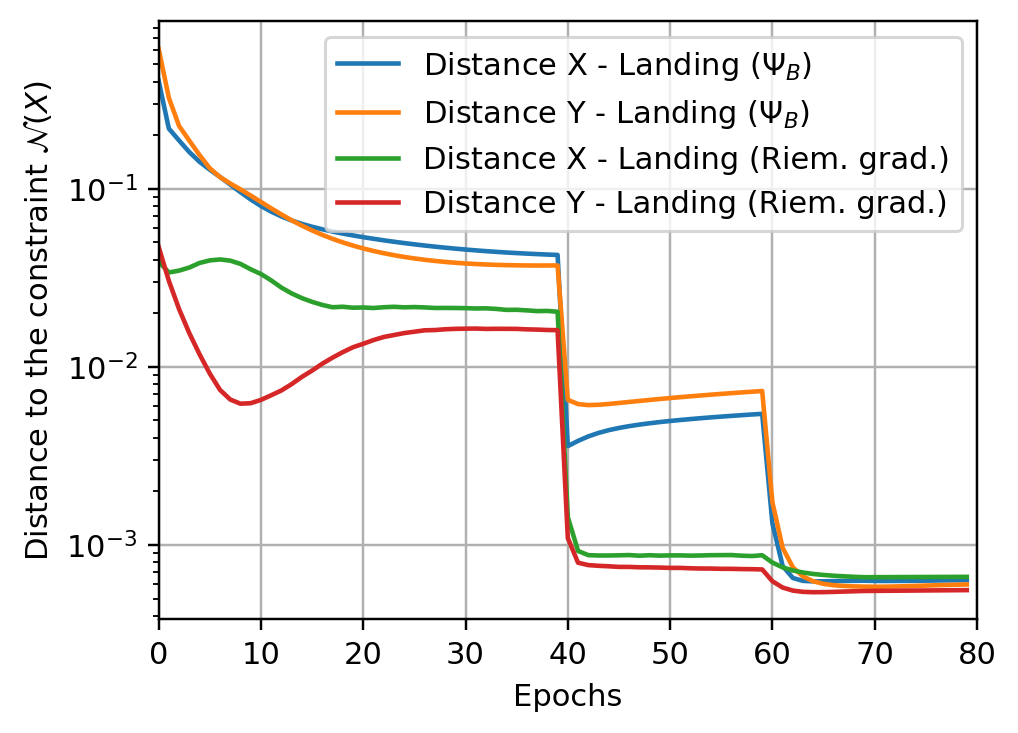

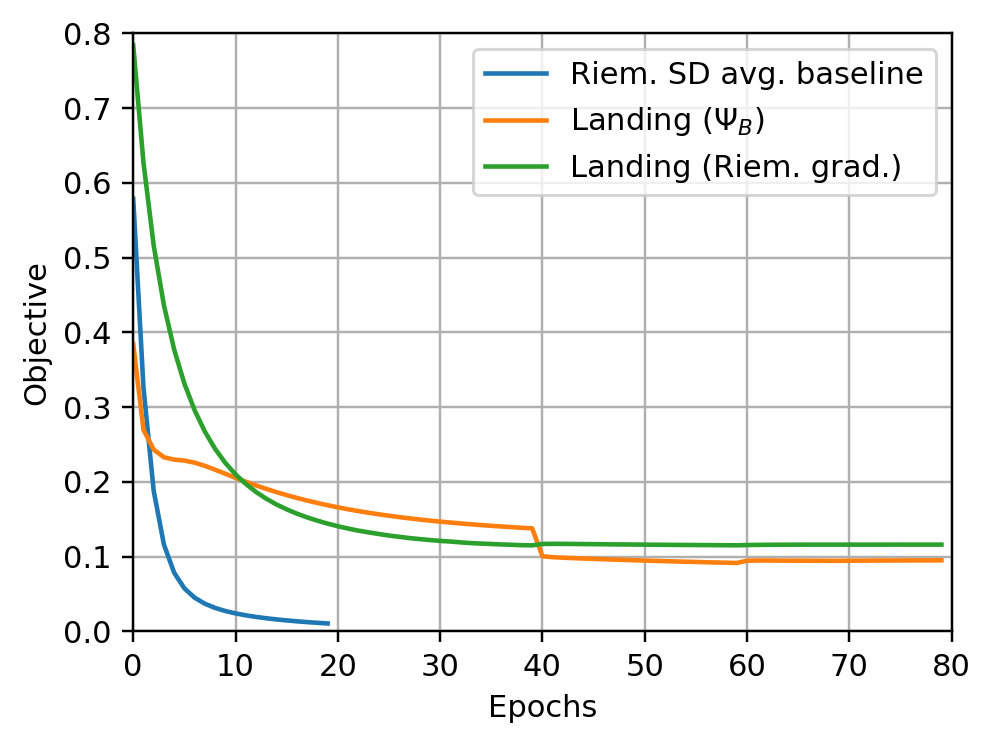

In [10]:
xmax = 80
out = out2
plt.figure(figsize=(1.2*4, 1.2*3), dpi=220)
plt.semilogy(out2['distanceX'], label = 'Distance X - Landing ($\Psi_B$)')
plt.semilogy(out2['distanceY'], label = 'Distance Y - Landing ($\Psi_B$)')
plt.semilogy(out3['distanceX'], label = 'Distance X - Landing (Riem. grad.)')
plt.semilogy(out3['distanceY'], label = 'Distance Y - Landing (Riem. grad.)')
plt.xlim([0, xmax])
x_ = plt.xlabel('Epochs')
y_ = plt.ylabel('Distance to the constraint $\mathcal{N}(X)$')
plt.grid()
plt.legend(ncol=1, loc='upper right', columnspacing=.5, handlelength=2)
plt.show()
#plt.savefig('cca_distance.pdf', bbox_inches='tight', bbox_extra_artists=(x_, y_))

plt.figure(figsize=(1.2*4, 1.2*3), dpi=220)
plt.plot(-(np.array(out1['objective'])-obj_true)/obj_true, label='Riem. SD avg. baseline')
plt.plot(-(np.array(out2['objective'])-obj_true)/obj_true, label='Landing ($\Psi_B$)')
plt.plot(-(np.array(out3['objective'])-obj_true)/obj_true, label='Landing (Riem. grad.)')
plt.xlim([0, xmax])
plt.ylim([0,0.8])
x_ = plt.xlabel('Epochs')
y_ = plt.ylabel('Objective')
plt.legend(ncol=1, loc='upper right', columnspacing=.5, handlelength=2)

plt.grid()
plt.show()
#plt.savefig('cca_objective.pdf', bbox_inches='tight', bbox_extra_artists=(x_, y_))

In [25]:
covA, covB, covAB = loader_to_cov(loader_A, loader_B, device = 'cuda')

In [26]:
u_true, s_true, v_true = cca_closed_form(covA, covB, covAB, epsilon=1e-3, verb = True)
u_true = u_true[:,:5]
v_true = v_true[:,:5]
obj_true = -torch.trace(u_true.T@covAB@v_true).item()

adding eps to diagonal and taking inverse
taking square root
dot products...
trying to take final svd
computed everything!


In [36]:
u_svcca, s_svcca, v_svcca,_ = svcca(covA, covB, covAB, 
                                    5,epsilon=1e-3, verb=False)
obj_svcca = -torch.trace(u_svcca.T@covAB@v_svcca).item()
print(obj_svcca)

-2.457584857940674


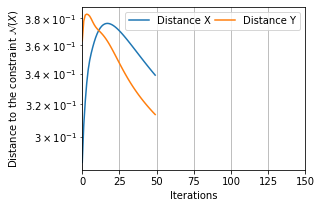

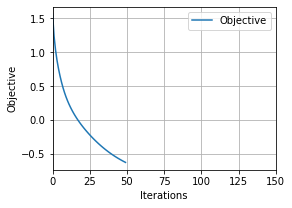

In [37]:
xmax = 150
plt.figure(figsize=(4, 3))
plt.semilogy(out['distanceX'], label = 'Distance X')
plt.semilogy(out['distanceY'], label = 'Distance Y')
plt.xlim([0, xmax])
x_ = plt.xlabel('Iterations')
y_ = plt.ylabel('Distance to the constraint $\mathcal{N}(X)$')
plt.grid()
plt.legend(ncol=2, loc='upper right', columnspacing=.5, handlelength=2)
plt.show()
#plt.savefig('cca_distance.pdf', bbox_inches='tight', bbox_extra_artists=(x_, y_))

plt.figure(figsize=(4, 3))
plt.plot(np.array(out['objective'])-obj_svcca, label='Objective')
plt.xlim([0, xmax])
x_ = plt.xlabel('Iterations')
y_ = plt.ylabel('Objective')
plt.legend(ncol=2, loc='upper right', columnspacing=.5, handlelength=2)

plt.grid()
plt.show()
#plt.savefig('cca_objective.pdf', bbox_inches='tight', bbox_extra_artists=(x_, y_))

In [13]:
covA, covB, covAB = loader_to_cov(loader_A, loader_B,device = 'cuda')

In [14]:
u2, s, v2 = cca_closed_form(covA, covB, covAB, epsilon=1e-3, verb = True)

adding eps to diagonal and taking inverse
taking square root
dot products...
trying to take final svd
computed everything!


In [15]:
u3, s3, v3, covA_lr = svcca(covA, covB, covAB, 20,epsilon=1e-3, verb=False)

In [17]:
torch.trace(u3[:,:5].T @ covAB @ v3[:,:5])

tensor(3.5696, device='cuda:0')

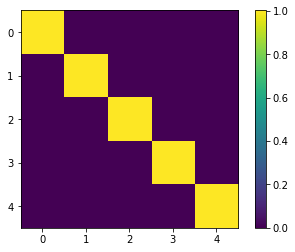

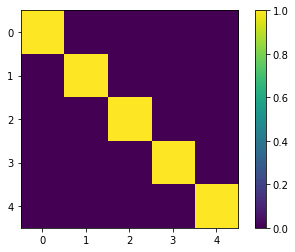

In [131]:
t = (u2[:,:5].T @ (covA) @ u2[:,:5] )
plt.imshow(t.to('cpu').numpy())
plt.colorbar()
plt.show()

t = (u3[:,:5].T @ (covA) @ u3[:,:5] )
plt.imshow(t.to('cpu').numpy())
plt.colorbar()
plt.show()

In [132]:
torch.trace(u3[:,:5].T @ covAB @ v3[:,:5])

tensor(2.4585, device='cuda:0')

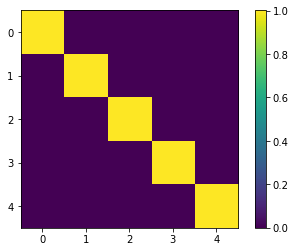

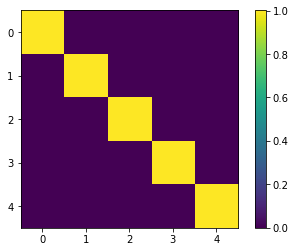

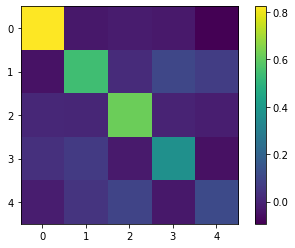

In [123]:
t = (u3[:,:5].T @ (covA+ 0*torch.eye(covA.size(0),device = 'cuda')) @ u3[:,:5] )
plt.imshow(t.to('cpu').numpy())
plt.colorbar()
plt.show()

t = v3[:,:5].T @ covB @ v3[:,:5]
plt.imshow(t.to('cpu').numpy())
plt.colorbar()
plt.show()

t = u3[:,:5].T @ covAB @ v3[:,:5]
plt.imshow(t.to('cpu').numpy())
plt.colorbar()
plt.show()

In [73]:
-.5*torch.trace(u[:,:5].T @ covAB @ v2[:,:5])

tensor(-5.1856, device='cuda:0')

In [38]:
s[]

tensor([9.5715e-01, 9.5101e-01, 9.4251e-01, 9.3523e-01, 9.2088e-01, 9.0934e-01,
        8.8670e-01, 8.7153e-01, 8.6323e-01, 8.4781e-01, 8.2756e-01, 7.9694e-01,
        7.9582e-01, 7.7435e-01, 7.1616e-01, 6.9989e-01, 6.7249e-01, 6.4909e-01,
        6.1516e-01, 6.0704e-01, 6.0128e-01, 5.6698e-01, 5.6296e-01, 5.4830e-01,
        5.2868e-01, 5.2117e-01, 5.0359e-01, 4.9318e-01, 4.7748e-01, 4.6498e-01,
        4.4853e-01, 4.3690e-01, 4.1060e-01, 4.0842e-01, 4.0235e-01, 3.7984e-01,
        3.6849e-01, 3.4648e-01, 3.3081e-01, 3.2615e-01, 3.2344e-01, 3.0239e-01,
        2.9616e-01, 2.8004e-01, 2.6412e-01, 2.6223e-01, 2.5506e-01, 2.4749e-01,
        2.3632e-01, 2.2991e-01, 2.2095e-01, 2.1566e-01, 2.1178e-01, 2.0379e-01,
        1.9978e-01, 1.9227e-01, 1.8859e-01, 1.8609e-01, 1.8329e-01, 1.7779e-01,
        1.7107e-01, 1.6841e-01, 1.6377e-01, 1.6031e-01, 1.5616e-01, 1.5267e-01,
        1.4768e-01, 1.4719e-01, 1.4493e-01, 1.4224e-01, 1.3870e-01, 1.3528e-01,
        1.3511e-01, 1.3339e-01, 1.3154e-

In [39]:
def eval_CCA(covA, covB, covAB, num_components, eps):
    evals_covA, evecs_covA = torch.linalg.eigh(covA + eps*torch.eye(covA.size(0), device= covA.device))
    evals_covB, evecs_covB = torch.linalg.eigh(covB + eps*torch.eye(covB.size(0), device= covA.device))
    covA_isqrt = evecs_covA @ torch.diag(evals_covA**(-0.5)) @ evecs_covA.T
    covB_isqrt = evecs_covB @ torch.diag(evals_covB**(-0.5)) @ evecs_covB.T
    u, s, v = torch.linalg.svd(covA_isqrt @ covAB @ covB_isqrt, full_matrices = False)
    x_true = u[:,:num_components]
    xy_corr = s[:num_components]
    y_true = v[:num_components,:].T
    return(x_true, y_true, xy_corr)

SyntaxError: invalid syntax (1910750013.py, line 1)

In [15]:
covA, covB, covAB = loader_to_cov(loader_A, loader_B,device = 'cuda')

ValueError: too many values to unpack (expected 2)

In [9]:
x_true, y_true, xy_corr = eval_CCA(AtA_full, BtB_full, AtB_full, 10, eps = 1e-5)
x_true = x_true.cpu().numpy()
y_true = y_true.cpu().numpy()

In [23]:
np.trace(x_true.T @ AtB @ y_true )

302.72025

In [11]:
np.trace(X_cpu.T @ AtB @ Y_cpu )

0.93079555

In [24]:
np.linalg.norm(x_true.T @ AtA @ x_true - np.eye(x_true.shape[1]))

266.71440591739673

In [25]:
np.linalg.norm(X_cpu.T @ AtA @ X_cpu - np.eye(X_cpu.shape[1]))

1.9673596152934258

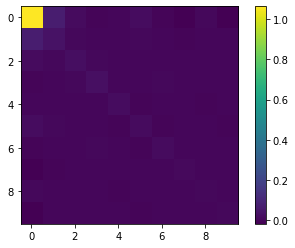

In [30]:
plt.imshow(x_true.T @ AtA @ x_true/250 )
plt.colorbar()

In [17]:
X_cpu.shape

(392, 5)

In [71]:
ind = 1
plt.imshow(np.hstack((x_true[:,ind].reshape(28,14), X_cpu[:,ind].reshape(28,14))))
plt.show()
plt.imshow(np.hstack((y_true[:,ind].reshape(28,14), Y_cpu[:,ind].reshape(28,14))))
plt.show()

NameError: name 'x_true' is not defined

In [14]:
np.trace(x_true.T @ AtB @ y_true)

286.57953

In [15]:
torch.linalg.norm(AtB_full)

tensor(258.4471, device='cuda:0')

In [16]:
torch.trace(X.T @ AtB_full @ Y)

tensor(3.4283, device='cuda:0', grad_fn=<TraceBackward0>)

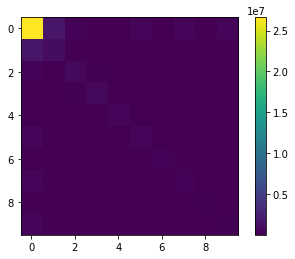

In [36]:
plt.imshow(np.abs(x_true.T @ (AtA +1e-5* np.eye(AtA.shape[0]))@ x_true)/1e-5)
plt.colorbar()


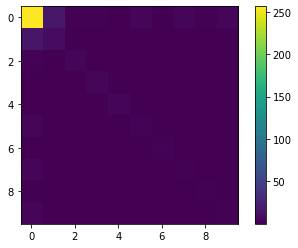

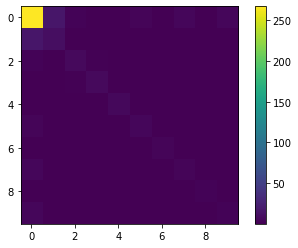

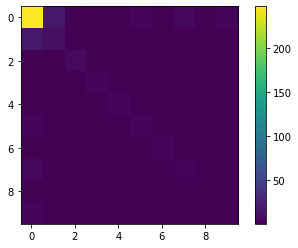

In [26]:
plt.imshow(np.abs(x_true.T @ AtB @ y_true))
plt.colorbar()
plt.show()
plt.imshow(np.abs(x_true.T @ (AtA + np.eye(AtA.shape[0]))@ x_true))
plt.colorbar()
plt.show()
plt.imshow(np.abs(y_true.T @ BtB @ y_true))
plt.colorbar()
plt.show()

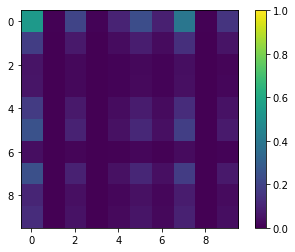

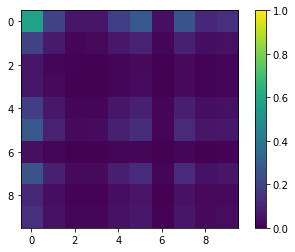

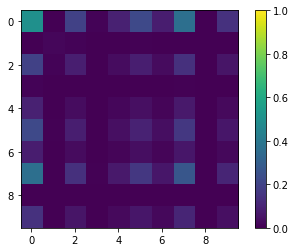

In [21]:
plt.imshow(np.abs(X_cpu.T @ AtB @ Y_cpu), clim=[0,1])
plt.colorbar()
plt.show()
plt.imshow(np.abs(X_cpu.T @ AtA @ X_cpu), clim=[0,1])
plt.colorbar()
plt.show()
plt.imshow(np.abs(Y_cpu.T @ BtB @ Y_cpu), clim=[0,1])
plt.colorbar()
plt.show()

In [13]:
etmp, _ = np.linalg.eig(AtA - np.eye(392))

In [15]:
etmp

array([ 2.66689097e+02+0.0000000e+00j,  9.43700916e+00+0.0000000e+00j,
        8.70814200e+00+0.0000000e+00j,  7.32059792e+00+0.0000000e+00j,
        6.66185297e+00+0.0000000e+00j,  5.01854101e+00+0.0000000e+00j,
        4.05924116e+00+0.0000000e+00j,  2.72082343e+00+0.0000000e+00j,
        2.36344196e+00+0.0000000e+00j,  1.95435479e+00+0.0000000e+00j,
        1.57381174e+00+0.0000000e+00j,  1.37952409e+00+0.0000000e+00j,
        1.06334154e+00+0.0000000e+00j,  1.00946705e+00+0.0000000e+00j,
        6.99567605e-01+0.0000000e+00j,  6.22834248e-01+0.0000000e+00j,
        4.86948107e-01+0.0000000e+00j,  2.85375365e-01+0.0000000e+00j,
        1.96197248e-01+0.0000000e+00j,  1.72451268e-01+0.0000000e+00j,
        2.67297552e-02+0.0000000e+00j,  4.09396356e-03+0.0000000e+00j,
       -1.25836575e-01+0.0000000e+00j, -1.51021580e-01+0.0000000e+00j,
       -2.28162298e-01+0.0000000e+00j, -2.50873026e-01+0.0000000e+00j,
       -3.42771064e-01+0.0000000e+00j, -3.90080180e-01+0.0000000e+00j,
      

/opt/mambaforge/envs/landing/lib/python3.8/site-packages/numpy/lib/histograms.py:839: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/opt/mambaforge/envs/landing/lib/python3.8/site-packages/matplotlib/axes/_axes.py:6740: ComplexWarning: Casting complex values to real discards the imaginary part
  bins = np.array(bins, float)  # causes problems if float16


(array([391.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([ -1.00000004,  25.7689097 ,  52.53781943,  79.30672917,
        106.0756389 , 132.84454864, 159.61345838, 186.38236811,
        213.15127785, 239.92018759, 266.68909732]),
 <BarContainer object of 10 artists>)

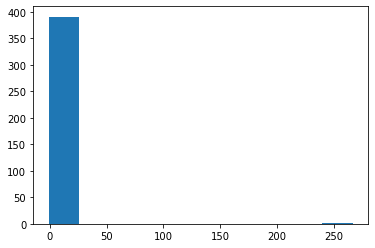

In [14]:
plt.hist(etmp)

In [6]:
AtAinv = np.linalg.inv(AtA+0.000005*np.eye(392,392))
BtBinv = np.linalg.inv(BtB+0.000005*np.eye(392,392))

In [7]:
# True solution:
d, u  = np.linalg.eig(AtAinv@AtB@BtBinv@AtB.T)
u1 = u[:,:10]
d, u  = np.linalg.eig(BtBinv@AtB.T@AtAinv@AtB)
u2 = u[:,:10]

In [8]:
u.shape

(392, 392)

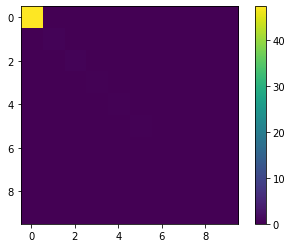

In [9]:
plt.imshow(np.abs(u1.T @ AtB @ u2))
plt.colorbar()

In [10]:
plt.rcParams.update({'text.usetex' : True})

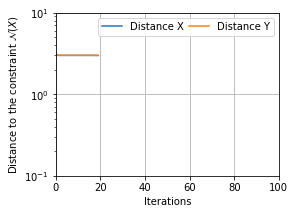

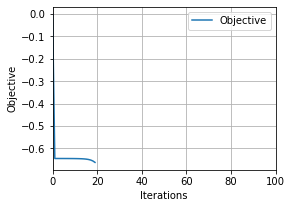

In [15]:
plt.figure(figsize=(4, 3))
plt.semilogy(out['distanceX'], label = 'Distance X')
plt.semilogy(out['distanceY'], label = 'Distance Y')
plt.xlim([0, 100])
plt.ylim([1e-1, 1e1])
x_ = plt.xlabel('Iterations')
y_ = plt.ylabel('Distance to the constraint $\mathcal{N}(X)$')
plt.grid()
plt.legend(ncol=2, loc='upper right', columnspacing=.5, handlelength=2)
plt.show()
#plt.savefig('cca_distance.pdf', bbox_inches='tight', bbox_extra_artists=(x_, y_))

plt.figure(figsize=(4, 3))
plt.plot(np.array(out['objective']), label='Objective')
plt.xlim([0, 100])
x_ = plt.xlabel('Iterations')
y_ = plt.ylabel('Objective')
plt.legend(ncol=2, loc='upper right', columnspacing=.5, handlelength=2)

plt.grid()
plt.show()
#plt.savefig('cca_objective.pdf', bbox_inches='tight', bbox_extra_artists=(x_, y_))



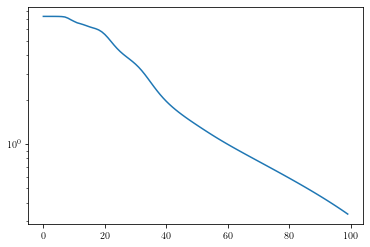

In [20]:
plt.semilogy(np.array(out['objective'])+7.5)

In [27]:
AtA = AtA_full.cpu().numpy()
BtB = BtB_full.cpu().numpy()
AtB = AtB_full.cpu().numpy()

X_cpu = X.detach().cpu().numpy()
Y_cpu = Y.detach().cpu().numpy()

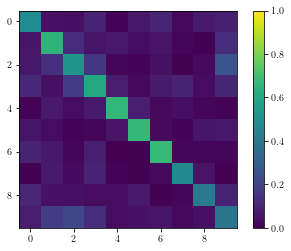

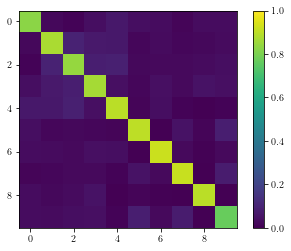

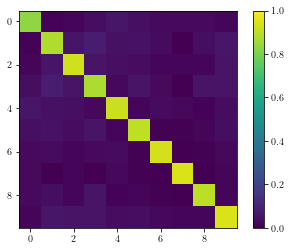

In [12]:
plt.imshow(np.abs(X_cpu.T @ AtB @ Y_cpu), clim=[0,1])
plt.colorbar()
plt.show()
plt.imshow(np.abs(X_cpu.T @ AtA @ X_cpu), clim=[0,1])
plt.colorbar()
plt.show()
plt.imshow(np.abs(Y_cpu.T @ BtB @ Y_cpu), clim=[0,1])
plt.colorbar()
plt.show()

In [25]:
np.linalg.norm(np.diag(AtB))

12.141672

In [27]:
AtB.shape

(392, 392)

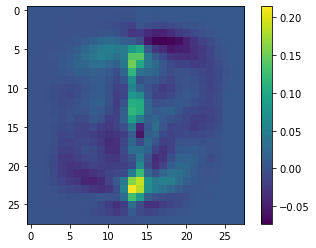

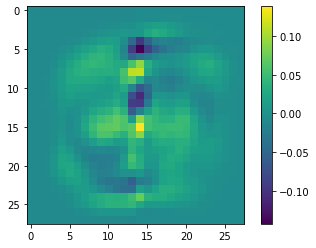

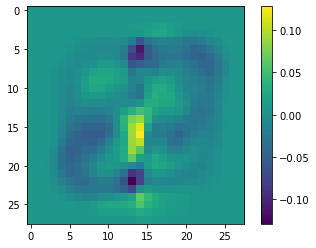

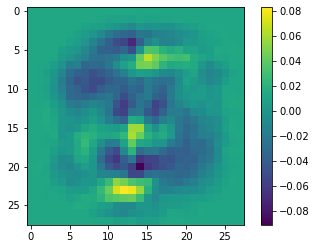

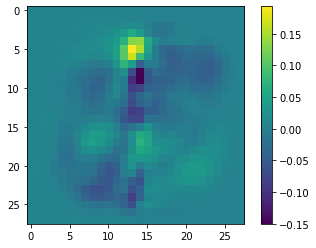

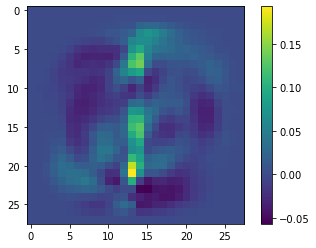

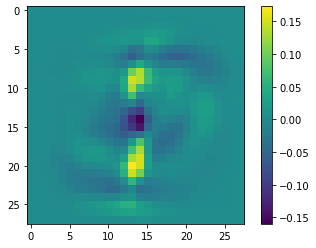

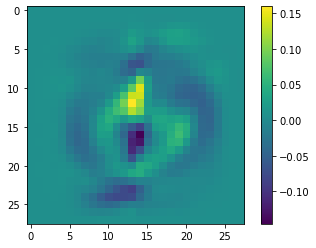

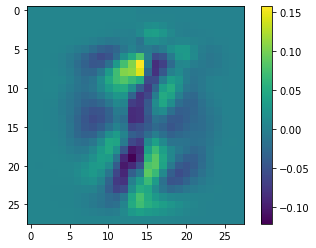

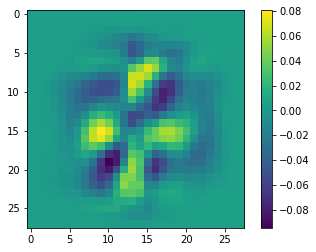

In [13]:
for i in range(10):
    x_tmp = (X_cpu[:,i]).reshape(28,-1)
    y_tmp = (Y_cpu[:,i]).reshape(28,-1)
    plt.imshow(np.concatenate([x_tmp,y_tmp],axis=1))
    plt.colorbar()
    plt.show()

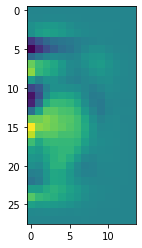

In [20]:
plt.imshow((Y_cpu[:,1]).reshape(28,-1))

In [8]:
(AtA@X_cpu).shape

(392, 10)

In [9]:
((AtA@X_cpu) @ (X_cpu.T @ AtA @ X_cpu - np.eye(10,10)))

array([[  920.11036875, -2085.72863305,    73.47406366, ...,
          -51.14708096,  -130.66572299,   723.7861788 ],
       [  920.11036875, -2085.72863305,    73.47406366, ...,
          -51.14708096,  -130.66572299,   723.7861788 ],
       [  920.11036875, -2085.72863305,    73.47406366, ...,
          -51.14708096,  -130.66572299,   723.7861788 ],
       ...,
       [  924.12707451, -2077.03577179,    83.54595979, ...,
          -53.66739613,  -124.3442831 ,   724.10880686],
       [  925.05992824, -2072.99607729,    85.97999375, ...,
          -55.178644  ,  -122.47910508,   723.33150251],
       [  925.23880473, -2069.96477653,    87.36572159, ...,
          -56.11967307,  -121.45809028,   722.52802804]])

In [ ]:
plt.imshow((Q2.T @ features2.T@ features2 @ Q2).cpu().detach().numpy())
plt.colorbar()
plt.show()

plt.imshow((Q1.T @ features1.T@ features1 @ Q1).cpu().detach().numpy())
plt.colorbar()
plt.show()

plt.imshow(np.abs((Q1.T @ features1.T@ features2 @ Q2).cpu().detach().numpy()))
plt.colorbar()
plt.show()

print(torch.diag((features1 @ Q1).T @ (features2 @ Q2)))

In [3]:
n_epochs = 15
device = 'cuda'

model1 = VGG16()
model1.to(device)

optimizer1 = optim.SGD(model1.parameters(), lr=1e-1, weight_decay=5e-4)

model2 = VGG16()
model2.to(device)

optimizer2 = optim.SGD(model2.parameters(), lr=1e-1, weight_decay=5e-4)


In [4]:
def train(model, optimizer, n_epochs):
    best_test_acc = 0.
    for epoch in range(n_epochs):
        model.train()
        train_loss = 0.0
        for batch_idx, (batch_x, batch_y) in enumerate(trainloader):
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)
            logits = model(batch_x)
            loss = model.loss(logits, batch_y)
            train_loss =+ loss.item() * batch_x.size(0)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        print(train_loss)

        # Test
        model.eval()
        with torch.no_grad():
            test_loss = 0.
            correct = 0.
            for batch_x, batch_y in testloader:
                batch_x, batch_y = batch_x.to(device), batch_y.to(device)
                logits = model(batch_x)
                loss = model.loss(logits, batch_y)
                test_loss += loss.item() * batch_x.size(0)
                correct += model.correct(logits, batch_y).item()
        print(100 * correct / len(testset))

train(model1, optimizer1, 50)
#train(model2, optimizer2, 8)

1773.303123474121
15.86
1374.267978668213
33.33
1244.390037536621
41.07


KeyboardInterrupt: 

In [4]:
#torch.save(model1, 'VGG16_1.pt')
#torch.save(model2, 'VGG16_2.pt')
model1 = torch.load('VGG16_1.pt')
model2 = torch.load('VGG16_2.pt')

In [5]:
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

model1.features[10].register_forward_hook(get_activation('features1'))
model2.features[10].register_forward_hook(get_activation('features2'))

In [6]:
batch_idx, (batch_x, batch_y) = enumerate(trainloader).__next__()
batch_x, batch_y = batch_x.to(device), batch_y.to(device)


with torch.no_grad():
    _ = model1(batch_x)
    _ = model2(batch_x)
    features1 = activation['features1'].view((activation['features1'].shape[0],-1))
    features2 = activation['features2'].view((activation['features2'].shape[0],-1))
    features1 = (features1 - torch.mean(features1, dim=0))
    features2 = (features2 - torch.mean(features2, dim=0))

p = 20
_, S1, Q1 = torch.linalg.svd(features1, full_matrices=False)
_, S2, Q2 = torch.linalg.svd(features2, full_matrices=False)
Q1 = Q1[:p,:].T / S1[:p]
Q2 = Q2[:p,:].T / S2[:p]

best_test_acc = 0.
learning_rate = 1e-8
lambda_regul = 1
Q1 = torch.nn.Parameter(Q1)
Q2 = torch.nn.Parameter(Q2)

optimizerCCA = LandingGeneralizedStiefel((Q1,Q2), 
        lr=learning_rate, lambda_regul=lambda_regul)

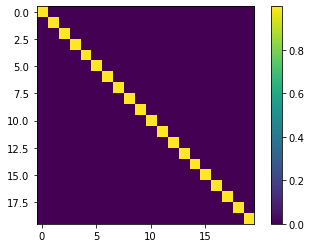

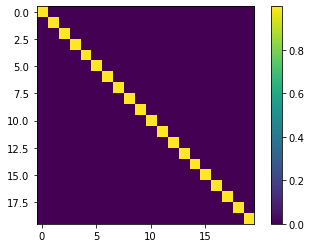

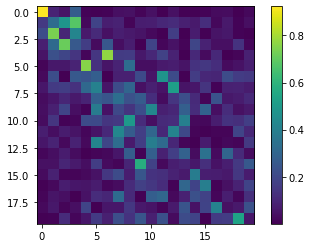

tensor([ 0.9232, -0.3281, -0.0975,  0.2592, -0.0148, -0.1336, -0.0028,  0.2133,
         0.2294,  0.2198,  0.0368, -0.1025, -0.1010,  0.2862, -0.0598,  0.0766,
         0.0082, -0.0771,  0.0641, -0.0572], device='cuda:0',
       grad_fn=<DiagBackward0>)


In [7]:
plt.imshow((Q2.T @ features2.T@ features2 @ Q2).cpu().detach().numpy())
plt.colorbar()
plt.show()

plt.imshow((Q1.T @ features1.T@ features1 @ Q1).cpu().detach().numpy())
plt.colorbar()
plt.show()

plt.imshow(np.abs((Q1.T @ features1.T@ features2 @ Q2).cpu().detach().numpy()))
plt.colorbar()
plt.show()

print(torch.diag((features1 @ Q1).T @ (features2 @ Q2)))

In [8]:
for g in optimizerCCA.param_groups:
      g['lr'] = g['lr'] / 10
      g['lambda_regul'] = g['lambda_regul']

In [9]:
for epoch in range(20):
    model1.eval()
    model2.eval()
    train_loss = 0
    dist1 = torch.zeros(p,p, device = device)
    dist2 = torch.zeros(p,p, device = device)
    for batch_idx, (batch_x, batch_y) in enumerate(trainloader):
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)
        with torch.no_grad():
            _ = model1(batch_x)
            _ = model2(batch_x)
            features1 = activation['features1'].view((activation['features1'].shape[0],-1))
            features2 = activation['features2'].view((activation['features2'].shape[0],-1))
            features1 = (features1 - torch.mean(features1, dim=0))
            features2 = (features2 - torch.mean(features2, dim=0))
        loss = -torch.trace( (Q1.T @ features1.T) @ (features2 @ Q2)) /  (batch_x.size(0))
        train_loss =+ loss.item() * batch_x.size(0)
        dist1 += (features1 @ Q1).T @ (features1 @ Q1) 
        dist2 += (features2 @ Q2).T @ (features2 @ Q2)
        optimizerCCA.zero_grad()
        loss.backward()
        optimizerCCA.step(((features1, features2 ),))
    print('Objective: %2.5f' % train_loss)
    print('Dist Q1: %2.5f' % (torch.linalg.norm(dist1 - torch.eye(p,p, device = device)).item() / len(trainloader)))
    print('Dist Q2: %2.5f' % (torch.linalg.norm(dist2 - torch.eye(p,p, device = device)).item() /len(trainloader)) )

Objective: -9.61416
Dist Q1: 3.65003
Dist Q2: 3.80091
Objective: -11.50668
Dist Q1: 3.65394
Dist Q2: 3.85008
Objective: -12.63437
Dist Q1: 3.65651
Dist Q2: 3.83800
Objective: -13.01447
Dist Q1: 3.65966
Dist Q2: 3.82516
Objective: -13.49870
Dist Q1: 3.66194
Dist Q2: 3.81374
Objective: -13.58173
Dist Q1: 3.66460
Dist Q2: 3.80699
Objective: -13.77267
Dist Q1: 3.66724
Dist Q2: 3.80016
Objective: -13.37390
Dist Q1: 3.66966
Dist Q2: 3.79381
Objective: -13.87409
Dist Q1: 3.67225
Dist Q2: 3.78871
Objective: -13.73200
Dist Q1: 3.67494
Dist Q2: 3.78571
Objective: -13.83156
Dist Q1: 3.67704
Dist Q2: 3.78237
Objective: -13.64179
Dist Q1: 3.68011
Dist Q2: 3.77989
Objective: -13.66645
Dist Q1: 3.68256
Dist Q2: 3.77719
Objective: -13.82600
Dist Q1: 3.68515
Dist Q2: 3.77541
Objective: -13.63936
Dist Q1: 3.68733
Dist Q2: 3.77366
Objective: -13.83434
Dist Q1: 3.68974
Dist Q2: 3.77330
Objective: -13.85437
Dist Q1: 3.69237
Dist Q2: 3.77259
Objective: -13.80661
Dist Q1: 3.69492
Dist Q2: 3.77249
Objective: 

In [3]:
def VectorizeImage(batch):
    data = [item[0].view(-1).unsqueeze(1)[:500] for item in batch]
    return(torch.cat(data, dim = 1))

loader_A = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=False, num_workers=2, collate_fn=VectorizeImage)

In [6]:
LandingCCA(iter(loader_A), iter(loader_A), p = 10, learning_rate = 1e-3, lambda_regul = 1,  n_epochs=5, device = 'cuda')

KeyboardInterrupt: 

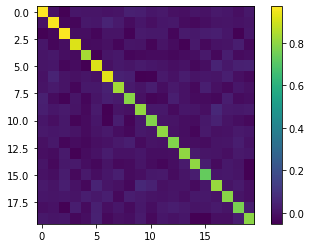

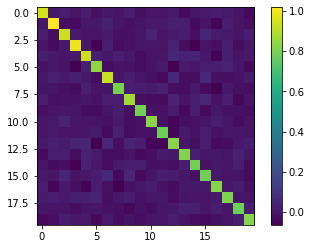

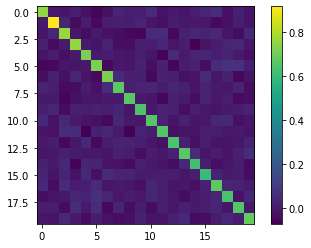

In [10]:
plt.imshow(dist1.cpu().detach().numpy()/len(trainloader))
plt.colorbar()
plt.show()

plt.imshow(dist2.cpu().detach().numpy()/len(trainloader))
plt.colorbar()
plt.show()

plt.imshow((Q1.T @ features1.T@ features2 @ Q2).cpu().detach().numpy())
plt.colorbar()
plt.show()

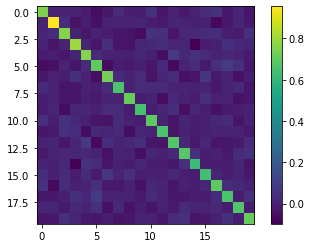

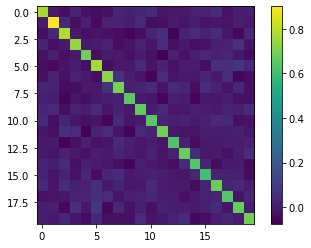

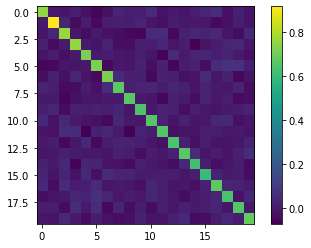

In [12]:
plt.imshow((Q2.T @ features2.T@ features2 @ Q2).cpu().detach().numpy())
plt.colorbar()
plt.show()

plt.imshow((Q1.T @ features1.T@ features1 @ Q1).cpu().detach().numpy())
plt.colorbar()
plt.show()

plt.imshow((Q1.T @ features1.T@ features2 @ Q2).cpu().detach().numpy())
plt.colorbar()
plt.show()

In [ ]:
torch.diag(Q1.T @ features1.T@ features2 @ Q2).sum()

tensor(25.3942, device='cuda:0', grad_fn=<SumBackward0>)

In [ ]:
torch.linalg.norm(features1 @ features2.T)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (848x32768 and 16384x848)

In [ ]:
torch.linalg.norm(features1 @ Q1 @ Q2.T @ features2.T)

tensor(1.7435, device='cuda:0', grad_fn=<LinalgVectorNormBackward0>)

In [ ]:
(features1 @ Q1 @ Q2.T @ features2.T).shape

torch.Size([80, 80])

In [ ]:
(features1 @ features2.T).shape

torch.Size([80, 80])

In [217]:
x_true = B_sqrt_inv  @ uG[:,:p]

NameError: name 'B_sqrt_inv' is not defined

In [204]:
torch.linalg.norm((features1 @ Q1).T @ (features1 @ Q1) - torch.eye(p,p, device = device))

tensor(4.3785, device='cuda:0', grad_fn=<LinalgVectorNormBackward0>)

In [218]:
torch.diag((features1 @ Q1).T @ (features2 @ Q2))

tensor([0.3751, 0.4544, 0.3530, 0.4672, 0.3098, 0.4153, 0.3651, 0.4537, 0.3104,
        0.4110, 0.4458, 0.3260, 0.3644, 0.4497, 0.4044, 0.4983, 0.4550, 0.3374,
        0.3649, 0.3223, 0.4536, 0.3510, 0.5946, 0.3729, 0.4212, 0.4352, 0.5927,
        0.4242, 0.3799, 0.4061, 0.4219, 0.4915, 0.3397, 0.4305, 0.4621, 0.5205,
        0.3581, 0.3714, 0.3048, 0.3836], device='cuda:0',
       grad_fn=<DiagBackward0>)

In [219]:
torch.trace( (features1).T @ features2 )

tensor(-17784.1172, device='cuda:0')

In [321]:
torch.trace( (features1 @ Q1).T @ features2 @ Q2) / 40

tensor(0.6224, device='cuda:0', grad_fn=<DivBackward0>)

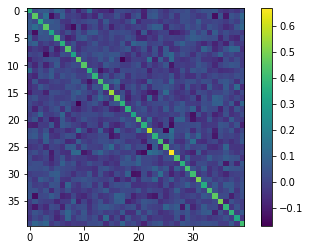

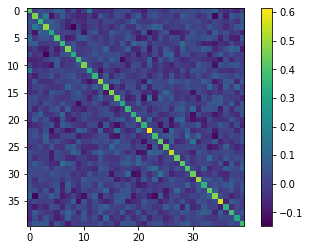

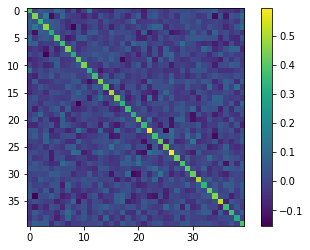

In [221]:
plt.imshow((Q2.T @ features2.T@ features2 @ Q2).cpu().detach().numpy())
plt.colorbar()
plt.show()

plt.imshow((Q1.T @ features1.T@ features1 @ Q1).cpu().detach().numpy())
plt.colorbar()
plt.show()

plt.imshow((Q1.T @ features1.T@ features2 @ Q2).cpu().detach().numpy())
plt.colorbar()
plt.show()

In [246]:
torch.trace(Q1.T @ features1.T@ features2 @ Q2)

tensor(6.8522, device='cuda:0', grad_fn=<TraceBackward0>)

In [19]:
(features1 @ Q1).T @ 

torch.Size([80, 40])

In [53]:
D1 = (features1 @ Q1).cpu().detach().numpy()
D2 = (features2 @ Q2).cpu().detach().numpy()

D1 = (D1 - D1.mean(axis=0)) #  / D1.std(axis=0) 
D2 = (D2 - D2.mean(axis=0)) # / D2.std(axis=0)
Cov12 = D1.T @ D2 / D1.shape[0]


In [55]:
from scipy.stats import pearsonr

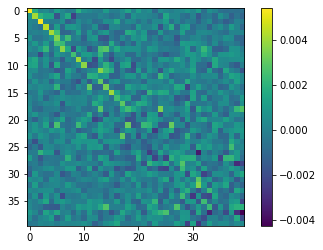

In [54]:
plt.imshow(Cov12 / ())
plt.colorbar()

In [56]:
torch.corrcoef((features1 @ Q1).T, (features2 @ Q2).T)

TypeError: corrcoef() takes 1 positional argument but 2 were given

In [17]:
Q1.shape

torch.Size([32768, 40])

In [244]:
(features1 * features1).sum()

tensor(2588672., device='cuda:0')

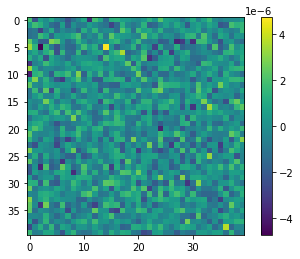

In [245]:
plt.imshow((Q1.T @ Q2).cpu().detach().numpy())
plt.colorbar()

In [17]:
for batch_idx, (batch_x, batch_y) in enumerate(trainloader):
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)
        with torch.no_grad():
            features1 = model1.features(batch_x).squeeze()
            features2 = model2.features(batch_x).squeeze()
        covXY += features1.T @ features2 / batch_x.size(0)
        covX += features1.T @ features1 / batch_x.size(0)
        covY += features2.T @ features2 / batch_x.size(0)

In [41]:
len(trainloader.dataset)

50000

In [18]:
loss = -.5*torch.trace( Q1.T @ features1.T @ features2 @ Q2)

In [22]:
loss.backward()

In [23]:
optimizerCCA.step(((features1.T@ features1, features2.T@ features2),))

In [25]:
train_loss =+ loss.item() * batch_x.size(0)

In [34]:
loss.item()

-0.34627026319503784

In [36]:
-.5*torch.trace( Q1.T @ features1.T @ features2 @ Q2)

tensor(-0.3463, device='cuda:0', grad_fn=<MulBackward0>)

In [18]:
trainloader_enum = enumerate(trainloader)

In [33]:
i, (batch_x, batch_y) = trainloader_enum.__next__()
batch_x, batch_y = batch_x.to(device), batch_y.to(device)

In [87]:
A1 = model1.features(batch_x)[:,:,0,0].cpu().detach().numpy()
A2 = model1.features(batch_x)[:,:,0,0].cpu().detach().numpy()

In [142]:
n = 512
p = 10
Q1 = torch.randn(n, p, device = device, requires_grad=True)
Q2 = torch.randn(n, p, device = device, requires_grad=True)

In [145]:
optimizer_cca = optim.SGD((Q1, Q2), lr=1e-6)

In [147]:
best_test_acc = 0.
model1.eval()
model2.eval()
for epoch in range(n_epochs):
    train_loss = 0.0
    for batch_idx, (batch_x, batch_y) in enumerate(trainloader):
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)
        A1 = model1.features(batch_x)[:,:,0,0].detach()
        A2 = model2.features(batch_x)[:,:,0,0].detach()
        loss = - torch.trace(Q1.T@ (A1.T @ A2) @ Q2)
        train_loss =+ loss.item() * batch_x.size(0)
        optimizer_cca.zero_grad()
        loss.backward()
        optimizer_cca.step()
        with torch.no_grad():
            Q1,_ = torch.linalg.qr(Q1)
            Q2,_ = torch.linalg.qr(Q2)
        Q1.requires_grad = True
        Q2.requires_grad = True
    print(train_loss/len(trainset))

-11.53541328125
-12.8180953125
-10.70384453125
-10.55670625
-10.276184375
-11.49911875
-10.47547421875
-10.5956484375
-9.82373359375
-9.57715546875
-10.41351875
-10.265225
-10.7919796875
-10.0132453125
-9.96588125


In [139]:
Q1.T@Q1

tensor([[ 1.0000e+00,  5.5879e-09, -2.7940e-09, -9.3132e-09,  9.3132e-10,
          4.6566e-09, -8.8476e-09, -1.2107e-08, -1.9558e-08, -5.5879e-09],
        [ 5.5879e-09,  1.0000e+00,  3.2596e-09,  1.1642e-09,  6.7521e-09,
          3.7253e-09, -5.1223e-09, -1.8626e-09, -2.7940e-09,  1.0245e-08],
        [-2.7940e-09,  3.2596e-09,  1.0000e+00, -2.3283e-10, -8.3819e-09,
          4.1910e-09, -1.3970e-08, -3.2596e-09, -9.3132e-10, -6.5193e-09],
        [-9.3132e-09,  1.1642e-09, -2.3283e-10,  1.0000e+00, -1.5600e-08,
          0.0000e+00,  1.8626e-09,  4.6566e-10,  2.3283e-10,  4.6566e-10],
        [ 9.3132e-10,  6.7521e-09, -8.3819e-09, -1.5600e-08,  1.0000e+00,
         -4.6566e-10, -8.3819e-09,  4.6566e-09,  5.5879e-09,  3.7253e-09],
        [ 4.6566e-09,  3.7253e-09,  4.1910e-09,  0.0000e+00, -4.6566e-10,
          1.0000e+00,  2.4680e-08,  2.7940e-09, -5.5879e-09,  3.2596e-09],
        [-8.8476e-09, -5.1223e-09, -1.3970e-08,  1.8626e-09, -8.3819e-09,
          2.4680e-08,  1.0000e+0

In [89]:
from sklearn.cross_decomposition import CCA

In [96]:
cca = CCA(n_components=10)
cca.fit(A1, A2)

CCA(n_components=10)

In [99]:
cca.score(A1, A2)

0.5813387144987419

In [92]:
X_c, Y_c = cca.transform(A1, A2)

In [75]:
(U, S, V) = torch.pca_lowrank(A1.T@A2, q = 100, center=True, niter=20)

In [84]:
S.cpu().detach().numpy()[:50]

array([1.0347093e+04, 5.0820493e+03, 3.5821323e+03, 2.9084653e+03,
       2.4939863e+03, 1.8302538e+03, 1.3989786e+03, 1.1476134e+03,
       8.5155157e+02, 6.2643530e+02, 2.4559721e+02, 7.1573997e+01,
       5.0670170e+01, 4.8174137e+01, 4.1952473e+01, 3.7283165e+01,
       3.6203281e+01, 3.1056530e+01, 2.5350792e+01, 2.4845078e+01,
       2.2801348e+01, 2.0585983e+01, 1.9518456e+01, 1.7976635e+01,
       1.6180603e+01, 1.5687751e+01, 1.3683533e+01, 1.2015533e+01,
       1.0651150e+01, 1.0012889e+01, 9.1580162e+00, 8.3238554e+00,
       7.8208060e+00, 7.5031281e+00, 6.8287992e+00, 6.1659822e+00,
       5.9519992e+00, 5.1096954e+00, 4.9533033e+00, 4.3717241e+00,
       4.1098890e+00, 3.8927417e+00, 3.5315640e+00, 3.5272615e+00,
       3.4553266e+00, 3.2666328e+00, 3.1249063e+00, 3.0096223e+00,
       2.7635863e+00, 2.6369815e+00], dtype=float32)

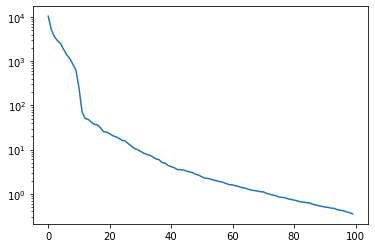

In [82]:
plt.semilogy(S.cpu().detach().numpy())

In [69]:
A1.shape

torch.Size([128, 512])

In [23]:
trainloader.batch_size

128

In [32]:
batch_x.shape

torch.Size([128, 3, 32, 32])